# Statistiques descriptives

In [1]:
# importation des données
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import json
import numpy as np
import gzip
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Circle
from sklearn.decomposition import PCA
from scipy import cluster
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.stats import chi2_contingency as chi2_contingency
from scipy.stats import pearsonr

import pandas as pd
import geopandas as gpd
import numpy as np
import requests
import tempfile
import zipfile
import json
import csv
import folium 
from shapely.geometry import Point, polygon
import matplotlib.pyplot as plt

In [2]:
path="/Users/dalilyoucefi/Documents/ProjetInfo/"

### Présentation de la base

In [3]:
#chargement de la base
df = pd.read_csv(path+'BaseQuartierLuSa.csv')
gdf = gpd.read_file(path+'GeoTierLunsSA.geojson')


**Dictionnaire des variables de df** :
- *c_qu*= numéro du quartier administratif
- *l_qu*= nom du quartier administratif
- *prop_0-14* = proportion de la population de 0-14 ans dans l'arrondissement
- *prop_15-29* = proportion de la population de 15-29 ans dans l'arrondissement
- *prop_30-44* = proportion de la population de 30-44 ans dans l'arrondissement
- *prop_45-59* = proportion de la population de 45-59 ans dans l'arrondissement
- *prop_60-74* = proportion de la population de 60-74 ans dans l'arrondissement
- *prop_75+* = proportion de la population de plus de 75 ans dans l'arrondissement
- *nombre_0-1* = nombre d'individus ayant entre 0 et 14 ans dans l'arrondissement
- *nombre-15-* = nombre d'individus ayant entre 15 et 29 ans dans l'arrondissement
- *nombre-30-* = nombre d'individus ayant entre 30 et 44 ans dans l'arrondissement
- *nombre-45-* = nombre d'individus ayant entre 45 et 59 ans dans l'arrondissement
- *nombre-60-* = nombre d'individus ayant entre 60 et 74 ans dans l'arrondissement
- *nombre-75+* = nombre d'individus ayant plus de 75 ans dans l'arrondissement
- *pop* = nombre total d'individus dans l'arrondissement
- *densite* = densité de population au km²
- *nombretran* = nombre de station de métro/RER/tramway dans le quartier administratif
- *ref* = moyenne des loyers de référence du quartier administratif
- *nb_logmt_total* = nombre de logements sociaux financés par la ville de Paris dans le quartier administratif
- *nombre_de_commerce* = nombre de commerce dans le quartier administratif
- *nombreent*= nombre d'entreprises dans le quartier administratif
- *CA1* = moyenne des chiffres d'affaire des entreprises implantées dans le quartier administratif
- *nombretrottotal* = nombre total de trotinette dans le quartier administratif


**Dictionnaire des variables de gdf**:
- *ID* = numéro de la trottinette
- *BatteryLevel* = niveau de la batterie
- *Lat* = Latitude
- *Lng* = Longitude
- *Type* = type de la torttinette, en l'occurence escooter dans notre cas
- *Status* = Statut de la trottinette
- *Heure* = Heure à laquelle on a sélectionné nos données
- *Jour* = Lundi ou Samedi
- *Arrondissement* = numéro d'arrondissement
- *id_quartier* = numéro du quartier administratif
- *station_min* = nome de la station la plus proche
- *min_distance* = distance de la station la plus proche
- *ligne_min* = ligne de métro la plus proche
- *mode_min* = mode de transport la plus proche
- *c_qu* = numéro du quartier administratif
- *l_qu* = nom du quartier administratif
- *c_ar* = numéro de l'arrondissement
- *l_ar* = nom de l'arrondissement
- *prop_0-14* = proportion de la population de 0-14 ans dans l'arrondissement
- *prop_15-29* = proportion de la population de 15-29 ans dans l'arrondissement
- *prop_30-44* = proportion de la population de 30-44 ans dans l'arrondissement
- *prop_45-59* = proportion de la population de 45-59 ans dans l'arrondissement
- *prop_60-74* = proportion de la population de 60-74 ans dans l'arrondissement
- *prop_75+* = proportion de la population de plus de 75 ans dans l'arrondissement
- *nombre_0-1* = nombre d'individus ayant entre 0 et 14 ans dans l'arrondissement
- *nombre-15-* = nombre d'individus ayant entre 15 et 29 ans dans l'arrondissement
- *nombre-30-* = nombre d'individus ayant entre 30 et 44 ans dans l'arrondissement
- *nombre-45-* = nombre d'individus ayant entre 45 et 59 ans dans l'arrondissement
- *nombre-60-* = nombre d'individus ayant entre 60 et 74 ans dans l'arrondissement
- *nombre-75+* = nombre d'individus ayant plus de 75 ans dans l'arrondissement
- *pop* = nombre total d'individus dans l'arrondissement
- *densite* = densité de population au km²
- *nombretran* = nombre de station de métro/RER/tramway dans le quartier administratif
- *ref* = moyenne des loyers de référence du quartier administratif
- *nb_logmt_total* = nombre de logements sociaux financés par la ville de Paris dans le quartier administratif
- *nombre_de_commerce* = nombre de commerce dans le quartier administratif
- *geometry* = données spatiales


### Quelques représentations

###### Histogrammes

In [5]:
# on conserve uniquement les variables Heure , Jour et id_quartier pour l'histogramme
gdf_trott=gdf[['Heure','id_quartier',"Jour"]]

In [6]:
# Répartition des trottinettes selon l'heure


In [7]:
# Répartition des trottinettes selon l'heure
fig1 = px.histogram(gdf_trott, x="id_quartier", color="Jour")
fig1.update_layout(
    title="Répartition des trottinettes selon l'heure par quartier administratif",
    xaxis_title = "Quartier administratif",
    yaxis_title = "nombre",
    font = dict(
    family = "Courrier New, monospace",
    size=12,
    color = "Black"
    )
)
fig1.show()

In [11]:
fig1 = px.histogram(gdf_trott, x="id_quartier", color="Jour", barnorm="percent", nbins=150)
fig1.update_layout(
    title="Répartition des trottinettes selon l'heure par quartier administratif",
    xaxis_title = "Quartier administratif",
    yaxis_title = "nombre",
    font = dict(
    family = "Courrier New, monospace",
    size=12,
    color = "Black"
    )
)
fig1.show()

Dans la suite des statistiques descriptives , on ne va garder qu'un seul jour pour voir l'influence des autres paramètres sur la répartition des trotinettes. On choisit Samedi.

In [12]:
gdf_trott=gdf_trott[gdf_trott["Jour"]=="Samedi"]

In [13]:
fig1 = px.histogram(gdf_trott, x="id_quartier", color="Heure")
fig1.update_layout(
    title="Répartition des trottinettes selon l'heure par quartier administratif",
    xaxis_title = "Quartier administratif",
    yaxis_title = "nombre",
    font = dict(
    family = "Courrier New, monospace",
    size=12,
    color = "Black"
    )
)
fig1.show()

In [14]:
# Une autre représentation complémentaire de la première 
fig2 = px.histogram(gdf_trott, x="id_quartier", color="Heure", barnorm="percent",nbins=200)
fig2.update_layout(
    title="Proportion des trottinettes selon l'heure par quartier administratif",
    xaxis_title = "Quartier administratif",
    yaxis_title = "nombre",
    font = dict(
    family = "Courrier New, monospace",
    size=12,
    color = "Black"
    )
)
fig2.show()

On remarque que le nombre de trotinette par quartier administratif garde la même tendance selon les heures différentes de la journée. Ainsi, on peut uniquement considérer la variable *nombretrottotale*

###### Cartes

In [15]:
# Importation des fichiers
gdf_arrondissement = gpd.read_file(path+'arrondissements.geojson')
gdf_quartier = gpd.read_file(path+'quartier_paris.geojson')
gdf_transport = gpd.read_file(path+'emplacement-des-gares-idf.geojson') 
gdf_trottinette = gpd.read_file(path+'GeoTierLunsSA.geojson')

In [16]:
# Carte de Paris

url = 'https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12'
temporary_location = tempfile.gettempdir()

def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
    myfile = requests.get(url)
    open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
    with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
        zip_ref.extractall(dirname + '/' + destname)
        
download_unzip(url)
communes = gpd.read_file(temporary_location + "/borders/communes-20190101.json")
communes.head()

paris = communes[communes.insee.str.startswith("75")]

In [17]:
# indiquer à quel arrondissement appartient la ligne
def arrappartenance(point):
    for i in range(20):
        if point.within(gdf_arrondissement["geometry"][i]):
            return gdf_arrondissement["c_ar"][i]

# indiquer à quel quartier administratif appartient la ligne      
def numquartierappartenance(point):
    for i in range(80):
        if point.within(gdf_quartier["geometry"][i]):
            return gdf_quartier["c_qu"][i]

In [18]:
# on applique les fonctions précédentes au fichier gdf_transport
gdf_transport["arrondissement"]=gdf_transport["geometry"].apply(arrappartenance)
gdf_transport["numquartier"]=gdf_transport["geometry"].apply(numquartierappartenance)

Text(0.5, 1, 'Réseau métropolitain de Paris')

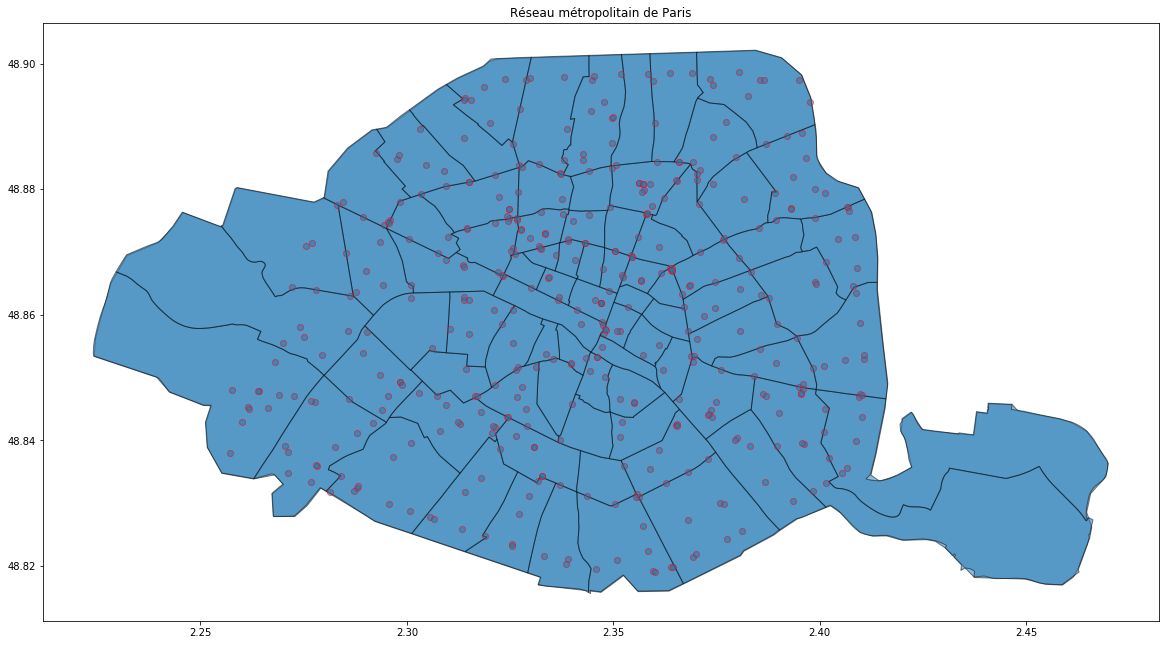

In [19]:
# Représentation de l'ensemble du réseau métropolitain de Paris

# On supprime les stations ne faisant pas parties de Paris
gdft = gdf_transport.dropna(subset=['arrondissement'])

# Affichage
ax = gdft.plot(figsize=(20, 20), alpha=0.5, edgecolor='r', zorder = 2)
paris.plot(ax = ax, figsize=(20, 20), alpha=0.5, edgecolor='k') 
gdf_quartier.plot(ax = ax,figsize=(20, 20), alpha=0.5, edgecolor='k')
plt.title('Réseau métropolitain de Paris')

Text(0.5, 1, 'Réseau métropolitain et trottinette dans le 13ème arrondissement de Paris')

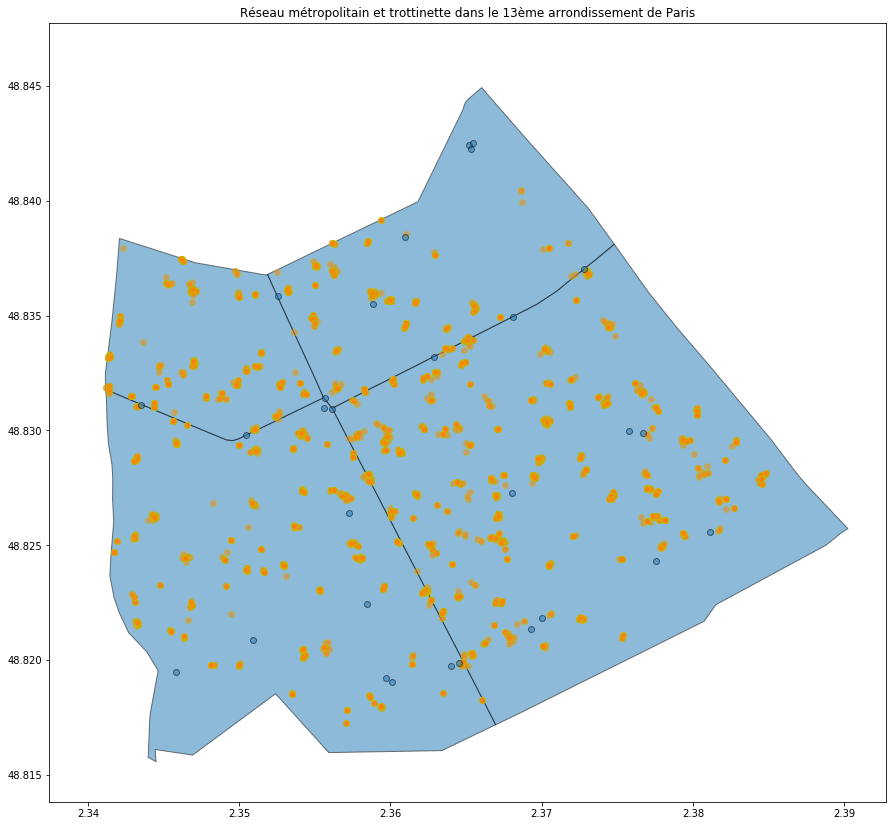

In [20]:
# Représentation de l'ensemble des métros et des trottinettes dans le 13ème arrondissement
ax = gdf_transport[gdf_transport["arrondissement"]==13.0].plot(figsize=(15, 15), alpha=0.5, edgecolor='k', zorder = 2)
gdf_quartier[gdf_quartier['c_ar']==13].plot(ax = ax,figsize=(15, 15), alpha=0.5, edgecolor='k')
gdf_trottinette[gdf_trottinette['Arrondissement']==13].plot(ax = ax,figsize=(15, 15), alpha=0.5, edgecolor='y')
plt.title('Réseau métropolitain et trottinette dans le 13ème arrondissement de Paris')

### ACP

In [21]:
def circleOfCorrelations(pc_infos, ebouli):
    
    plt.Circle((0,0),radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    for idx in range(len(pc_infos["PC-0"])):
        x = pc_infos["PC-0"][idx]
        y = pc_infos["PC-1"][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(pc_infos.index[idx], xy=(x,y))
    plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Circle of Correlations")

In [28]:
def myPCA(df, clusters=None):
    # Normalisation des données
    df_norm = (df - df.mean()) / df.std()
    # ACP
    pca = PCA(n_components='mle')
    pca_res = pca.fit_transform(df_norm.values)
    # Ebouli
    eigenvalues=pca.explained_variance_
    eigenvectors=pca.components_
    
    ebouli = pd.Series(pca.explained_variance_ratio_)
    ebouli.plot(kind='bar', title="Ebouli des valeurs propres")
    plt.show()

    coef = np.transpose(pca.components_)
    cols = ['PC-'+str(x) for x in range(len(ebouli))]
    pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)

    plt.show()
    # Plot ACP
    dat = pd.DataFrame(pca_res, columns=cols)
    if isinstance(clusters, np.ndarray):
        for clust in set(clusters):
            colors = list("bgrcmyk")
            plt.scatter(dat["PC-0"][clusters==clust],dat["PC-1"][clusters==clust],c=colors[clust])
    else:
        plt.scatter(dat["PC-0"],dat["PC-1"])
    plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.title("PCA")
    plt.show()
    return pc_infos, ebouli,eigenvalues,eigenvectors

In [23]:
df2=df[[ 'nombre_0-14',
       'nombre_15-29', 'nombre_30-44', 'nombre_45-59', 'nombre_60-74', 'nombre_75+',
       'pop', 'densite', 'nombretransport', 'ref', 'nb_logmt_total',
       'nombre_de_commerce', 'nombreent', 'CA 1','nombretrottotal']]

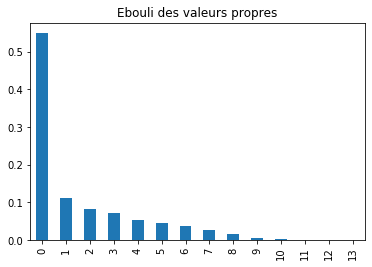

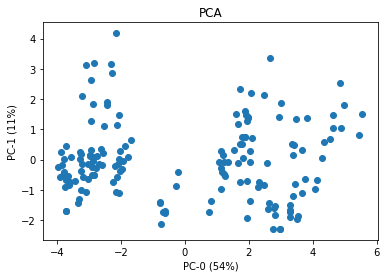

In [29]:
pc_infos,ebouli,eigenvalues,eigenvectors=myPCA(df2)

In [27]:
eigenvalues

array([8.24719332e+00, 1.65741884e+00, 1.23941302e+00, 1.06612558e+00,
       8.03432928e-01, 6.75952671e-01, 5.69660988e-01, 3.96364009e-01,
       2.22562514e-01, 7.75751942e-02, 2.86737314e-02, 8.67838692e-03,
       6.61122619e-03, 3.37593300e-04])

In [30]:
eigenvectors

array([[ 3.39909723e-01,  3.41176210e-01,  3.36054350e-01,
         3.42878757e-01,  3.39888418e-01,  3.18119675e-01,
         3.44068684e-01,  1.22130777e-03,  1.89170099e-01,
        -2.59871542e-01,  2.59350472e-01,  1.55761210e-01,
        -1.50408269e-02, -1.26155969e-03,  8.59197647e-02],
       [-7.99976321e-02, -4.23464518e-02, -9.99615438e-02,
        -6.25842231e-02, -1.18641277e-02,  8.14449998e-02,
        -5.10791701e-02, -2.34056826e-01,  3.34999915e-01,
         2.54770756e-01,  4.03625125e-02,  2.74375885e-01,
         5.49706883e-01,  9.68105623e-02,  5.90032249e-01],
       [-5.65912112e-02, -4.53844537e-02,  3.13660769e-02,
        -6.74569710e-02, -1.23851013e-01, -2.01771490e-01,
        -5.85476688e-02,  6.52476310e-01,  8.87559328e-02,
        -2.00425486e-01,  1.05794436e-01,  4.64549242e-01,
         1.01599695e-01, -4.63628959e-01,  6.06521103e-02],
       [ 1.70252475e-02, -2.51361269e-02,  1.68868462e-02,
        -1.05967273e-02, -5.12786359e-02, -6.89633387

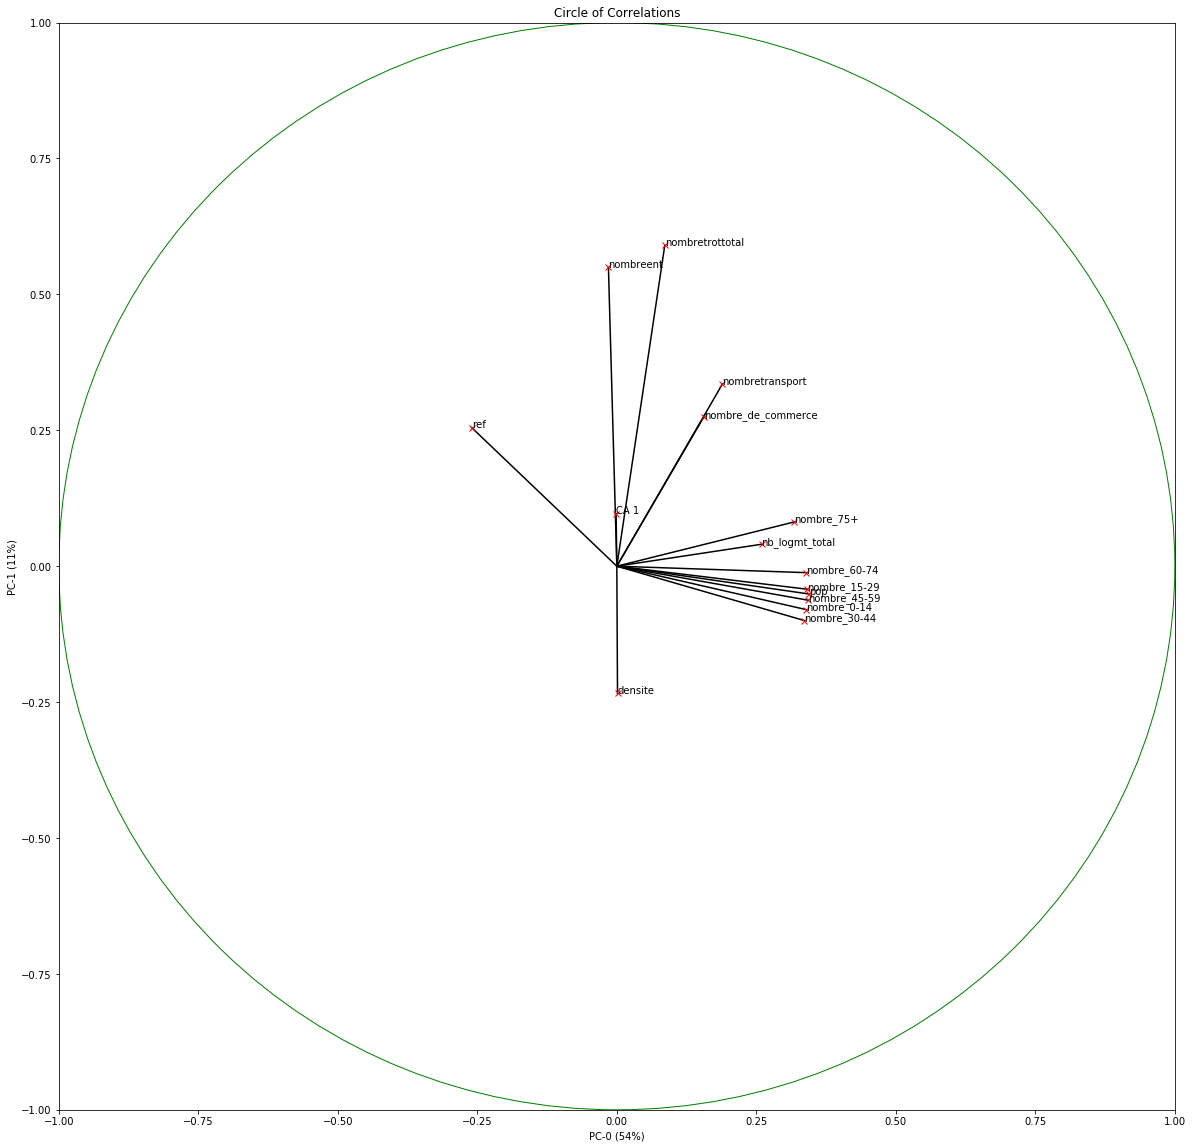

In [92]:
plt.figure(figsize=(20,20))
circleOfCorrelations(pc_infos, ebouli)
plt.show()

Avec le cercle des corrélations, on remarque que le nombre de trotinettes pour chaque heure est superposé, ainsi, il semble judicieux de ne considérer qu'une variable. Nous choisissons de prendre *nombretrtottotal*. De plus sur le cercle le nombre d'habitants par tranche d'âge, sauf pour les personnes de plus de 60 ans est quasi orthogonale avec le nombre de trotinette. Ainsi ces variables sontr peu explicatives pour le nombre de trotinettes. Il convient donc de les retirer pour notre analyse.

### Test de chi-2

##### Premier test

Comme évoqué dans l'étude du 6-T Bureau de recherche, il est indiqué que les utilisateurs venaient de milieu aisé. 
Ainsi nous allons faire un premier test vérifiant l'indépendance entre les variables *ref* et *nombrtrot* et une deuxième test entre les variables *nb_logmt_total* et *nombrtrot*. On va supposer que l'hypothèse nulle est : "il y a indépendance entre les variables" contre l'hypothèse alternative : "il y a dépendance entre les variables". On va donc effectuer un test de chi-2 à 79 DDL

In [93]:
# Test de chi-2 d'indépendance entre les variables ref et nombrtrot
df2=df[df["Jour"]=="Samedi"]
# Création du tableau de contingence
cont = df2[["ref", "nombretrottotal"]]

#Calcul avec scipy
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2,degrees,pvalue

(973.1803953590888, 79, 4.522781467951104e-154)

In [94]:
# Test de chi-2 d'indépendance entre les variables nb_logmt_total et nombrtrot

# Création du tableau de contingence
cont = df2[["nb_logmt_total", "nombretrottotal"]]

#Calcul avec scipy
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2,degrees,pvalue

(27603.79944629954, 79, 0.0)

On observe que pour les 2 tests les p-values sont quasiment voire nulles. Ainsi on peut rejeter l'hypothèse de dépendance entre les variables *nb_logmt_total* et *nombrtrot* et *ref* et *nombrtrot* au seuil de 0.1%

In [95]:
# Calcule du coefficient de Pearson entre les variables nb_logmt_total et ref
coeff_pearson,_ = pearsonr(df2['nb_logmt_total'],df2['ref'])
print("coefficient de Pearson = {}".format(coeff_pearson))

coefficient de Pearson = -0.7037697160123133


In [96]:
coeff_pearson,_ = pearsonr(df2['nombretrottotal'],df2['ref'])
print("coefficient de Pearson = {}".format(coeff_pearson))

coefficient de Pearson = 0.028471434629036375



On observe que *nb_logmt_total* et *ref* sont très corrélées tandis que *nombretrottotal* et *ref* ne le sont pas. Ainsi exécuter une régression linéaire de la variable indépendante *nombrtrot* sur les variables dépendantes *ref* et *nb_logmt_total* pourrait créer un biais de variable incluse. Ainsi si le biais a lieu, on supprimera la variable *ref* car elle ne pourra être considérée comme une variable omise.  

##### Deuxième test

Par ailleurs selon l'étude évoquée précédemment, les motifs principaux de l'utilisation des trottinettes électriques sont le déplacement pour se rendre au travail et pour se "promener".
Ainsi, on va de nouveau exécuter deux test de chi-2 d'indépendance entre les variables *nombreent* et *nombrtrot* et *nombre_de_commerce* et *nombrtrot* avec les mêmes hypothèses que précédemment.

In [97]:
# Test de chi-2 d'indépendance entre les variables nombreent et ref

# Création du tableau de contingence
cont = df2[["nombre_de_commerce", "nombretrottotal"]]

#Calcul avec scipy
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2,degrees,pvalue

(1090.507007269723, 79, 1.1954435239693468e-177)

In [98]:
# Test de chi-2 d'indépendance entre les variables nombreent et ref

# Création du tableau de contingence
cont = df2[["nombreent", "nombretrottotal"]]

#Calcul avec scipy
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2,degrees,pvalue

(6431.262629894004, 79, 0.0)

On observe dans les 2 tests une *p-value* proche de zéro voire nulle, ainsi on peut rejeter au seuil de 0.1% que l'hypothèse nulle.

In [99]:
# Calcule du coefficient de Pearson entre les variables nb_logmt_total et ref
coeff_pearson,_ = pearsonr(df2['nombreent'],df2['nombre_de_commerce'])
print("coefficient de Pearson = {}".format(coeff_pearson))

coefficient de Pearson = 0.14853851314277106


On a un coefficient de Pearson de 0.14, ce qui est peu élevé. Ainsi, exécuter une régression linéaire de la variable dépendante *nombrtrot* sur les variables indépendants *nombreent* et *nombre_de_commerce* est susceptible de ne pas créer un bais. On va donc garder ces deux variables dans notre jeu de données et notre régression

##### Troisième test

Mais encore, la trottinette un mode de transport à l'intermodalité. Ainsi on peut s'intéresser s'il y a indépendance entre le nombre de trottinette dans un quartier administratif et le nombre de stations de transport dans ce même lieu. 
De nouveau on va effectuer un test de chi-2 entre les variables *nombretran* et *nombrtrot*.

In [100]:
# Test de chi-2 d'indépendance entre les variables nombreent et ref

# Création du tableau de contingence
cont = df2[["nombretransport", "nombretrottotal"]]

#Calcul avec scipy
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2,degrees,pvalue

(293.99784067708407, 79, 1.6543156736414344e-26)

De nouveau on trouve une *p-value* très faible. Ainsi, on peut rejeter au seuil de 0.1% l'hypothèse nulle. Il y a donc dépendance entre les deux variables.

In [101]:
# Calcule du coefficient de Pearson entre les variables nb_logmt_total et ref
coeff_pearson,_ = pearsonr(df2['nombretransport'],df2['nombretrottotal'])
print("coefficient de Pearson = {}".format(coeff_pearson))

coefficient de Pearson = 0.37721719696706296


Les 2 variables sont plutôt corrélées, ainsi supprimer la variable *nombretran* pourrait créer un biais de variable omise